**Name:** Bala Guga Gopal S

**Batch:**  R2

**Date:** 20 Dec 2021

**Experiment Name:** Back Propagation Algorithm for XOR

**Experiment Description:** Implementing Back Propagation Algorithm for MLP: Classification Task (XOR)

### XOR LOGIC GATE

An XOR (exclusive OR gate) is a digital logic gate that gives a true output only when both its inputs differ from each other. The truth table for an XOR gate is shown below:

![image](https://user-images.githubusercontent.com/59637425/152112045-000d3293-839c-449a-b8dd-6a453c0e62d3.png)


If the input patterns are plotted according to their outputs, it is seen that these points are not linearly separable. Hence the neural network has to be modeled to separate these input patterns using decision planes.

![image](https://user-images.githubusercontent.com/59637425/152117582-e5bcf1a3-9bc5-4eaf-afbe-71abefd5a71a.png)


The neural network needs to produce two different decision planes to linearly separate the input data based on the output patterns. This is achieved by using the concept of hidden layers. The neural network will consist of one input layer with two nodes (X1,X2); one hidden layer with two nodes (since two decision planes are needed); and one output layer with one node (Y). Hence, the neural network looks like this:

![image](https://user-images.githubusercontent.com/59637425/152112413-f128cbbc-ea05-4540-9eca-93da6b71e72c.png)

Importing the required libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt

To implement an XOR gate, I will be using a Sigmoid Neuron as nodes in the neural network. The characteristics of a Sigmoid Neuron are:
1. Can accept real values as input.
2. The value of the activation is equal to the weighted sum of its inputs
i.e. ∑wi xi
3. The output of the sigmoid neuron is a function of the sigmoid function, which is also known as a logistic regression function. The sigmoid function is a continuous function which outputs values between 0 and 1

In [31]:
def sigmoid_func(x):
 y=1+np.exp(-x)
 y=1/y
 return y

Forward finding output for input layer, and passing it on to as the input for the hidden layer and doing same to get output of output layer.

In [32]:
def fwd_pass(X_training, wt1, wt2):
  a1=np.matmul(X_training,wt1)
  z1=sigmoid_func(a1)
  len_z1=len(z1)
  b=np.ones((len_z1,1))
  z1=np.concatenate((b,z1),axis=1)
  a2=np.matmul(z1,wt2)
  z2=sigmoid_func(a2)
  return a1,z1,a2,z2

Finding the loss (difference of predicted output and actual output) and hence finding derivatives, using the chain rule, going backwards.
Then weight updation by subtracting them , that is changing all weights and biases.


In [33]:
def back_propagation(a2, z0, z1, z2, y):
  diff2 = z2-y
  Derivative2=np.matmul(z1.T,diff2)
  diff1=(diff2.dot( w2[1:,:].T ))*sigmoid_func(a1)*(1-sigmoid_func(a1))
  Derivative1=np.matmul(z0.T,diff1)
  return diff2,Derivative1, Derivative2

In [34]:
# weight updation
def updateWeights(Derivative1,Derivative2,learning_rate,m,w1,w2):
  change_in_w1= learning_rate*(1/m)*Derivative1
  w1=w1 - change_in_w1
  change_in_w2= learning_rate*(1/m)*Derivative2
  w2= w2 - change_in_w2
  return w1,w2

In [35]:
# Predection
def predict(X_test,weight1,weight2):
  a1,z1,a2,z2=fwd_pass(X_test,weight1,weight2)
  return z2

In [36]:
# Testing
def test(X_test,y_test):
  y_predicted=predict(X_test,w1,w2)
  print("Test set is :")
  print(X_test[:,1:])
  print("\nPredicted values for Test set are")
  print(np.round(y_predicted))
  print("\n And actual y values for test set are")
  print(y_test)

In [40]:
# Input arrays
X = np.array([[1,0,0],
 [1,0,1],
 [1,1,0 ],
 [1,1,1]])
y=np.array([[0],
 [1],
 [1],
 [0]])

In [41]:
#Defining random weights(w1,w2) and learning rate, cost function, num of epochs
w1=np.random.randn(3,5)
w2=np.random.randn(6,1)
learning_rate=0.05
costs=[]
num_epoch=10000

In [42]:
# training (iterating throught the algo)
m=len(X)

for i in range(num_epoch):
  a1,z1,a2,z2=fwd_pass(X,w1,w2)
  diff2, Derivative1,Derivative2=back_propagation(a2,X,z1,z2,y)
  w1,w2=updateWeights(Derivative1,Derivative2,learning_rate,m,w1,w2)
  cost_i=np.mean(np.abs(diff2))
  costs.append(cost_i)
  if i == 0 or i==num_epoch-1:
    print("In Iterartion: "+ str(i+1))
    print("the error is :"+str(cost_i)+"\n")

In Iterartion: 1
the error is :0.5062935203192177

In Iterartion: 10000
the error is :0.045139892189890826



After the completion of Training :

Y value predicted: 
[[0.]
 [1.]
 [1.]
 [0.]]




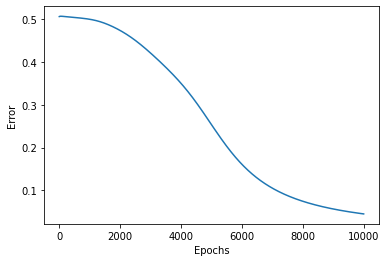

In [43]:
# error vs epoch plot and OUTPUT
print("After the completion of Training :\n")
z3=predict(X,w1,w2)
print("Y value predicted: ")
print(np.round(z3))
print("\n")
plt.plot(costs)
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.show()